In [412]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

In [413]:
#Loadng the users dataset
us_df = pd.read_csv(r"/Users/treva.ogwang/Desktop/Codes/investment/users.csv")
us_df

,user_id,age,country,income_level,investment_experience,num_investments,total_invested
0,1,58,Germany,Low,Novice,6,4306.73
1,2,32,France,Medium,Intermediate,14,15305.28
2,3,52,Germany,Medium,Novice,11,25018.27
3,4,23,France,Low,Intermediate,17,29858.32
4,5,53,France,Medium,Intermediate,18,42622.42
...,...,...,...,...,...,...,...
9995,9996,62,Germany,High,Novice,20,54535.88
9996,9997,19,Sweden,High,Intermediate,10,8895.99
9997,9998,44,Italy,Low,Novice,7,29307.56
9998,9999,35,France,High,Novice,7,10187.85


In [414]:
us_df.columns

Index(['user_id', 'age', 'country', 'income_level', 'investment_experience',
       'num_investments', 'total_invested'],
      dtype='object')

In [415]:
inv_df = pd.read_csv(r"/Users/treva.ogwang/Desktop/Codes/investment/investments.csv")
inv_df

,investment_id,user_id,investment_name,category,risk_level,amount_invested,return_percent
0,1,1,Crude Oil,Commodities,Medium,938.54,-11.68
1,2,1,Municipal Bond B,Bond,Low,339.19,9.78
2,3,1,S&P 500 Index Fund,Index Fund,High,119.68,9.19
3,4,1,Simon Property Group,Real Estate,Medium,2462.50,20.16
4,5,1,BMW,Stock,Low,41.60,-3.71
...,...,...,...,...,...,...,...
125017,125018,10000,Lyxor MSCI World,ETF,Medium,369.95,14.10
125018,125019,10000,Simon Property Group,Real Estate,High,2701.29,-5.55
125019,125020,10000,Litecoin,Crypto,Low,2448.56,-0.44
125020,125021,10000,Lyxor MSCI World,ETF,High,255.41,26.44


In [416]:
inv_df.columns

Index(['investment_id', 'user_id', 'investment_name', 'category', 'risk_level',
       'amount_invested', 'return_percent'],
      dtype='object')

1. EXPLORATORY DATA ANALYSIS

In [417]:
us_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                10000 non-null  int64  
 1   age                    10000 non-null  int64  
 2   country                10000 non-null  object 
 3   income_level           10000 non-null  object 
 4   investment_experience  10000 non-null  object 
 5   num_investments        10000 non-null  int64  
 6   total_invested         10000 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 547.0+ KB


In [418]:
us_df.describe()

,user_id,age,num_investments,total_invested
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,41.617600,12.502200,25022.772738
std,2886.89568,13.876463,4.577935,11643.631353
min,1.00000,18.000000,5.000000,943.710000
25%,2500.75000,30.000000,8.000000,15890.065000
50%,5000.50000,42.000000,13.000000,24011.995000
75%,7500.25000,54.000000,16.000000,32897.400000
max,10000.00000,65.000000,20.000000,75401.740000


In [419]:
inv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125022 entries, 0 to 125021
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   investment_id    125022 non-null  int64  
 1   user_id          125022 non-null  int64  
 2   investment_name  125022 non-null  object 
 3   category         125022 non-null  object 
 4   risk_level       125022 non-null  object 
 5   amount_invested  125022 non-null  float64
 6   return_percent   125022 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 6.7+ MB


In [420]:
inv_df.describe()

,investment_id,user_id,amount_invested,return_percent
count,125022.000000,125022.000000,125022.000000,125022.000000
mean,62511.500000,4977.688711,2001.469560,5.017727
std,36090.887015,2887.014936,2002.822844,14.972571
min,1.000000,1.000000,0.010000,-62.090000
25%,31256.250000,2473.000000,574.262500,-5.070000
50%,62511.500000,4977.000000,1390.320000,5.030000
75%,93766.750000,7461.000000,2767.367500,15.070000
max,125022.000000,10000.000000,21567.030000,75.420000


In [421]:
#Checking if all user_ids are valid.
invalid_users = us_df[~us_df['user_id'].isin(inv_df['user_id'])]
if invalid_users.empty:
    print("All user_ids in the investments dataset are valid.")
else:
    print("Invalid user_ids found in the investments dataset:")
    print(invalid_users)

All user_ids in the investments dataset are valid.


In [422]:
#Checking for missing values in the users dataset
us_df.isnull().sum()

user_id                  0
age                      0
country                  0
income_level             0
investment_experience    0
num_investments          0
total_invested           0
dtype: int64

In [423]:
#Checking for missing values in the investments dataset
inv_df.isnull().sum()

investment_id      0
user_id            0
investment_name    0
category           0
risk_level         0
amount_invested    0
return_percent     0
dtype: int64

In [424]:
#Checking for duplicates in the users dataset
us_duplicates = us_df[us_df.duplicated()]
if us_duplicates.empty:
    print("No duplicates found in the users dataset.")
else:
    print("Duplicates found in the users dataset:")
    print(us_duplicates)
#Checking for duplicates in the investments dataset
inv_duplicates = inv_df[inv_df.duplicated()]
if inv_duplicates.empty:
    print("No duplicates found in the investments dataset.")
else:
    print("Duplicates found in the investments dataset:")
    print(inv_duplicates)

No duplicates found in the users dataset.
No duplicates found in the investments dataset.


In [425]:
#Checking the different categories of investments
inv_df['category'].value_counts()

category
Crypto         18171
Commodities    17994
Index Fund     17839
ETF            17785
Bond           17767
Real Estate    17767
Stock          17699
Name: count, dtype: int64

In [426]:
#Deleting the country column from the users dataset
us_df = us_df.drop(columns=['country'])

2. DATA PREPROCESSING

FEATURE ENGINEERING

I will now create new features from the inv_df and add them later in the us_df 

In [427]:
#Getting the avg_investment per user - this will help us know how much each user invests on average. A highere avg_investment means that the user is more likely to invest more money and thus is a better candidate for the investment program.
avg_investment = inv_df.groupby('user_id')['amount_invested'].mean().rename('avg_investment')
avg_investment.head()

user_id
1     717.788333
2    1093.234286
3    2274.388182
4    1756.371765
5    2367.912222
Name: avg_investment, dtype: float64

In [428]:
#Getting the avg_return_percent per user - this will help us know how much each user earns on average. A higher return percent indicates a better investment thus translatind to the company earning more.
avg_return_percent = inv_df.groupby('user_id')['return_percent'].mean().rename('avg_return_percent')
avg_return_percent.head()

user_id
1    3.476667
2    0.785714
3    7.065455
4    1.881176
5    4.346667
Name: avg_return_percent, dtype: float64

In [429]:
# Create dominant_category with fallback to 'None' if all counts are 0
def mode_cat(series):
    mode_vals = series.mode()
    return mode_vals[0] if len(mode_vals) == 1 else 'None'

#Using the function to get the dominant category of investment per user
dominant_cateogory = inv_df.groupby('user_id')['category'].agg(mode_cat).rename('dominant_category')
dominant_cateogory.head()

user_id
1           None
2    Commodities
3         Crypto
4    Commodities
5            ETF
Name: dominant_category, dtype: object

In [430]:
#Merging the new created features with the users dataset to get a complete dataset of the users and their investment behaviour.
inv_features = pd.concat([avg_investment, avg_return_percent, dominant_cateogory], axis=1)
us_df_modified = us_df.merge(inv_features, on='user_id', how='left')
us_df_modified.head()

,user_id,age,income_level,investment_experience,num_investments,total_invested,avg_investment,avg_return_percent,dominant_category
0,1,58,Low,Novice,6,4306.73,717.788333,3.476667,None
1,2,32,Medium,Intermediate,14,15305.28,1093.234286,0.785714,Commodities
2,3,52,Medium,Novice,11,25018.27,2274.388182,7.065455,Crypto
3,4,23,Low,Intermediate,17,29858.32,1756.371765,1.881176,Commodities
4,5,53,Medium,Intermediate,18,42622.42,2367.912222,4.346667,ETF


In [431]:
# Return Per Investment (performance per transaction)
us_df_modified['return_per_investment'] = us_df_modified['avg_investment'] * us_df_modified['avg_return_percent']
us_df_modified.head()

,user_id,age,income_level,investment_experience,num_investments,total_invested,avg_investment,avg_return_percent,dominant_category,return_per_investment
0,1,58,Low,Novice,6,4306.73,717.788333,3.476667,None,2495.510772
1,2,32,Medium,Intermediate,14,15305.28,1093.234286,0.785714,Commodities,858.969796
2,3,52,Medium,Novice,11,25018.27,2274.388182,7.065455,Crypto,16069.586317
3,4,23,Low,Intermediate,17,29858.32,1756.371765,1.881176,Commodities,3304.045237
4,5,53,Medium,Intermediate,18,42622.42,2367.912222,4.346667,ETF,10292.525126


In [432]:
#Saving the new dataset to a csv file
us_df_modified.to_csv(r"/Users/treva.ogwang/Desktop/Codes/investment/users_investments.csv", index=False)
print("New dataset saved to users_investments.csv")

New dataset saved to users_investments.csv


In [433]:
#Checking the number of unique values in the investment_experince column
us_df_modified['investment_experience'].unique()

array(['Novice', 'Intermediate', 'Expert'], dtype=object)

In [434]:
us_df_modified['income_level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

Encoding

In [435]:
#We will use 2 encoding techniques to encode the categorical variables in the dataset. The first one is ordinal encoding which is used for ordinal categorical variables. The second one is one-hot encoding which is used for nominal categorical variables. 

us_df_encoded = us_df_modified.copy()

#Ordinal Encoding
#Defining the mapping for the ordinal categorical variables
income_order = {'Low': 1, 'Medium': 2, 'High': 3}
investment_order = {'Novice': 1, 'Intermediate': 2, 'Expert': 3}
dominant_risk_order = {'None': 1, 'Low': 2, 'Medium': 3, 'High': 4}

#Applying the mapping to the ordinal categorical variables
us_df_encoded['income_level_encoded'] = us_df_encoded['income_level'].map(income_order)
us_df_encoded['investment_experience_encoded'] = us_df_encoded['investment_experience'].map(investment_order)

# One-hot encode dominant_category
dominant_category_encoded = pd.get_dummies(us_df_modified['dominant_category'], prefix='category', dtype='int')
us_df_encoded = pd.concat([us_df_encoded, dominant_category_encoded], axis=1)

#Dropping the original categorical columns from the dataset
us_df_encoded.drop(columns=['dominant_category', 'income_level', 'investment_experience'], inplace=True)

us_df_encoded.head()

,user_id,age,num_investments,total_invested,avg_investment,avg_return_percent,return_per_investment,income_level_encoded,investment_experience_encoded,category_Bond,category_Commodities,category_Crypto,category_ETF,category_Index Fund,category_None,category_Real Estate,category_Stock
0,1,58,6,4306.73,717.788333,3.476667,2495.510772,1,1,0,0,0,0,0,1,0,0
1,2,32,14,15305.28,1093.234286,0.785714,858.969796,2,2,0,1,0,0,0,0,0,0
2,3,52,11,25018.27,2274.388182,7.065455,16069.586317,2,1,0,0,1,0,0,0,0,0
3,4,23,17,29858.32,1756.371765,1.881176,3304.045237,1,2,0,1,0,0,0,0,0,0
4,5,53,18,42622.42,2367.912222,4.346667,10292.525126,2,2,0,0,0,1,0,0,0,0


In [436]:
us_df_encoded.shape

(10000, 17)

In [437]:
#Dropping the user_id column from the dataset
us_df_encoded.drop(columns=['user_id'], inplace=True)
#Checking the final dataset
us_df_encoded.head()

,age,num_investments,total_invested,avg_investment,avg_return_percent,return_per_investment,income_level_encoded,investment_experience_encoded,category_Bond,category_Commodities,category_Crypto,category_ETF,category_Index Fund,category_None,category_Real Estate,category_Stock
0,58,6,4306.73,717.788333,3.476667,2495.510772,1,1,0,0,0,0,0,1,0,0
1,32,14,15305.28,1093.234286,0.785714,858.969796,2,2,0,1,0,0,0,0,0,0
2,52,11,25018.27,2274.388182,7.065455,16069.586317,2,1,0,0,1,0,0,0,0,0
3,23,17,29858.32,1756.371765,1.881176,3304.045237,1,2,0,1,0,0,0,0,0,0
4,53,18,42622.42,2367.912222,4.346667,10292.525126,2,2,0,0,0,1,0,0,0,0


Normalizing the data

In [438]:
#Using the StandardScaler to scale the numerical columns to a range of 0-1 for better analysis and modelling.
original_columns = us_df_encoded.columns

#Creating a scaler object
scaler = MinMaxScaler()

#Fitting the scaler to the dataset since all the columns are numerical.
us_df_scaled = scaler.fit_transform(us_df_encoded)

#Converting the scaled data back to a DataFrame
us_df_final = pd.DataFrame(us_df_scaled, columns=original_columns)

us_df_final.head()

,age,num_investments,total_invested,avg_investment,avg_return_percent,return_per_investment,income_level_encoded,investment_experience_encoded,category_Bond,category_Commodities,category_Crypto,category_ETF,category_Index Fund,category_None,category_Real Estate,category_Stock
0,0.851064,0.066667,0.045167,0.086808,0.458367,0.334610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.297872,0.600000,0.192881,0.148413,0.390433,0.324021,0.5,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.723404,0.400000,0.323331,0.342222,0.548966,0.422441,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.106383,0.800000,0.388334,0.257223,0.418088,0.339842,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.744681,0.866667,0.559761,0.357568,0.480330,0.385061,0.5,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


4. MODEL BUILDING

Elbow Method

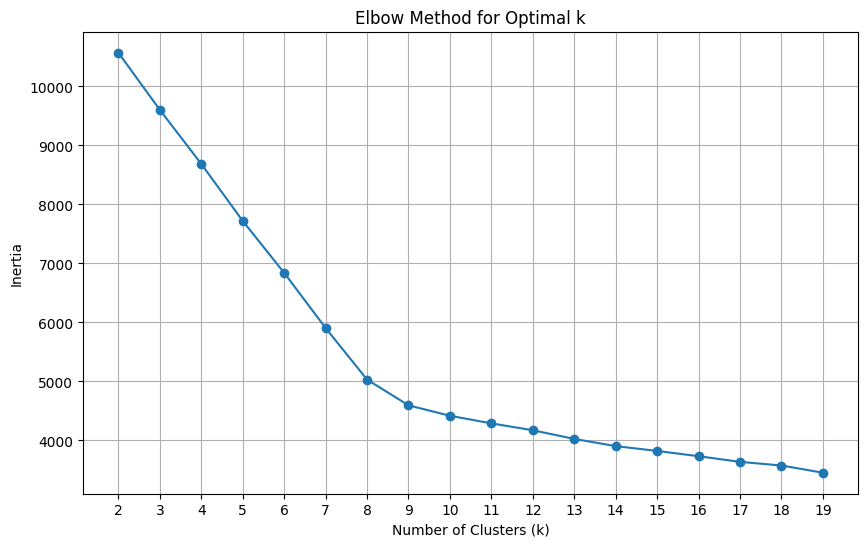

In [439]:
#Using the Elbow method to find the optimal number of clusters for KMeans clustering.
#Trying with 10 values of k
inertia = []
k_values = list(range(2, 20))

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    kmeans.fit(us_df_final)
    inertia.append(kmeans.inertia_)
    
#Plotting the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

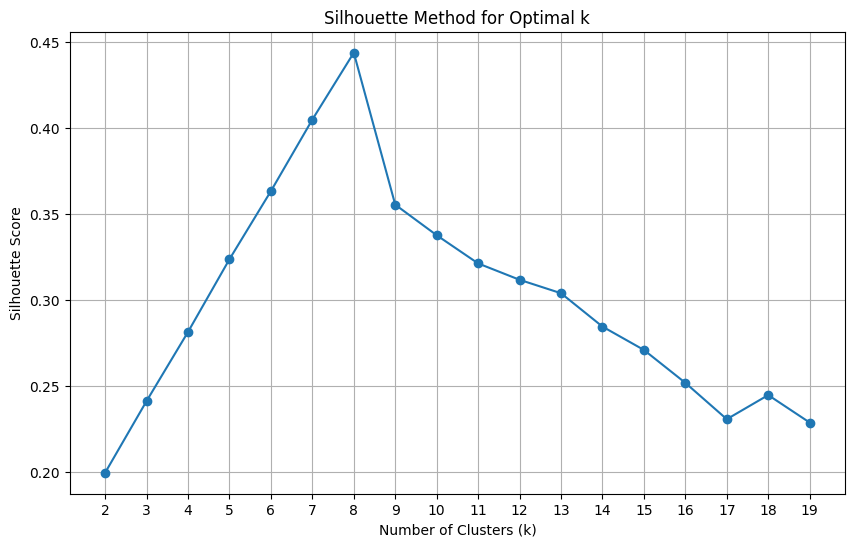

In [440]:
#Using the Silhouette method to find the optimal number of clusters for KMeans clustering just to confirm the results of the Elbow method.
silhouette_scores = []
k_values = list(range(2, 20))

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit(us_df_final).labels_
    score = silhouette_scores.append(silhouette_score(us_df_final, kmeans.labels_))
    
#Plotting the Silhouette method graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()
plt.show()

5. MODEL EVALUATION

In [441]:
# Apply K-Means clustering when k = 8
k = 8
kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
cluster_labels = kmeans.fit_predict(us_df_final)

# Add the cluster labels to your original dataset
us_df_encoded['cluster'] = cluster_labels

In [442]:
#Getting the silhouette score for the clustering when k = 8
sil_score = silhouette_score(us_df_final, cluster_labels)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.4437


In [444]:
from sklearn.decomposition import PCA

# Reduce to 3 components
pca_3d = PCA(n_components=3)
pca_3d_data = pca_3d.fit_transform(us_df_final)  # df_scaled = your scaled user feature DataFrame


In [445]:
# Wrap cluster centers into a DataFrame to preserve column names
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns=us_df_final.columns)
centroids_3d = pca_3d.transform(centroids_df)

In [446]:
import plotly.graph_objs as go

# Create a 3D scatter plot for users
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=pca_3d_data[:, 0],
    y=pca_3d_data[:, 1],
    z=pca_3d_data[:, 2],
    mode='markers',
    marker=dict(
        size=3,
        color=cluster_labels,  # output from KMeans
        colorscale='Viridis',
        opacity=0.6
    ),
    name='Users'
))

# Add centroids
fig.add_trace(go.Scatter3d(
    x=centroids_3d[:, 0],
    y=centroids_3d[:, 1],
    z=centroids_3d[:, 2],
    mode='markers',
    marker=dict(
        size=10,
        color='black',
        symbol='x',
        line=dict(width=2, color='white')
    ),
    name='Centroids'
))

# Layout
fig.update_layout(
    title='3D PCA Cluster Visualization with Centroids',
    scene=dict(
        xaxis_title='PCA 1',
        yaxis_title='PCA 2',
        zaxis_title='PCA 3'
    ),
    legend=dict(x=0.85, y=0.9),
    margin=dict(l=0, r=0, b=0, t=30)
)

fig.show()
